In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [1]:
pip install tensorflow


  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


In [2]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ['airplane' , 'automobile' , 'bird', 'cat' , 'deer', 'dog' , 'frog' , 'horse', 'ship','truck']

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

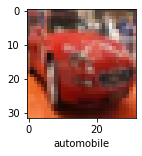

In [11]:
plot_sample(x_train,y_train,5)

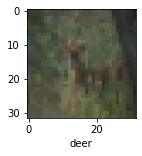

In [14]:

plot_sample(x_train,y_train,10)

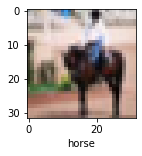

In [15]:
plot_sample(x_train,y_train,11)

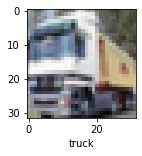

In [16]:
plot_sample(x_train,y_train,1)

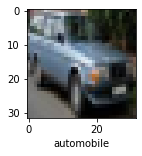

In [19]:
plot_sample(x_train,y_train,201)

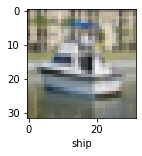

In [20]:
plot_sample(x_train,y_train,501)

In [21]:
x_train = x_train/255.0
x_test = x_test/255.0

In [32]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.8129 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6240 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.5421 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4822 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.4328 - accuracy: 0.4968


In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 9s 29ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.68      0.34      0.46      1000
           1       0.61      0.60      0.61      1000
           2       0.37      0.28      0.32      1000
           3       0.36      0.34      0.35      1000
           4       0.29      0.61      0.39      1000
           5       0.51      0.24      0.33      1000
           6       0.44      0.66      0.53      1000
           7       0.69      0.36      0.48      1000
           8       0.53      0.70      0.60      1000
           9       0.58      0.52      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [34]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

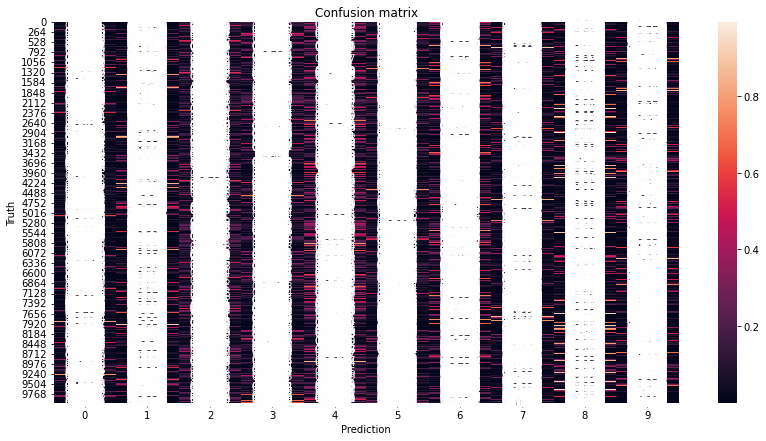

In [35]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [36]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [37]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [38]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 51s 31ms/step - loss: 1.4641 - accuracy: 0.4762
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1218 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9825 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8950 - accuracy: 0.6893
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8307 - accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7735 - accuracy: 0.7345
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7256 - accuracy: 0.7485
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6771 - accuracy: 0.7645
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6434 - accuracy: 0.7756
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [39]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9153 - accuracy: 0.6987


[0.9153150320053101, 0.6987000107765198]

In [40]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.7757609e-04, 1.8106231e-02, 3.4755780e-03, 7.7787775e-01,
        1.2763655e-03, 1.5688209e-01, 9.8059233e-03, 8.0859143e-04,
        3.1187277e-02, 3.0261770e-04],
       [5.7444391e-03, 2.1537416e-01, 1.5256411e-04, 3.0890518e-05,
        2.1955228e-07, 4.2804963e-06, 8.8761681e-07, 2.5503778e-07,
        7.7855945e-01, 1.3292267e-04],
       [1.5319945e-01, 1.5822884e-01, 5.2609867e-03, 1.8428796e-03,
        3.8898592e-03, 7.2908844e-04, 5.6248356e-04, 2.2735722e-04,
        6.1117047e-01, 6.4888574e-02],
       [9.3336368e-01, 1.0257404e-03, 1.9012878e-02, 3.6717942e-05,
        1.7519838e-04, 2.2387675e-07, 2.6900027e-05, 1.1299151e-06,
        4.6340052e-02, 1.7437818e-05],
       [9.5207535e-05, 6.8515990e-05, 2.5323248e-02, 8.5872255e-02,
        2.3193295e-01, 2.5440786e-02, 6.3060451e-01, 1.1558155e-04,
        4.6357940e-04, 8.3354658e-05]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

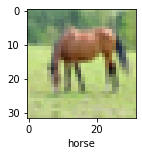

In [43]:
plot_sample(x_test,y_test,60)

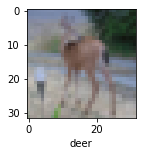

In [44]:
plot_sample(x_test,y_test,100)

In [45]:
classes[y_classes[60]]

'horse'